In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as image
%config InlineBackend.figure_format = 'retina' 

In [34]:
df_excel=pd.read_excel('NBA_Stats_71_Years_Updated.xlsx')
#Copy to improve performance
df=df_excel.copy()



In [35]:
df.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN


In [36]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

In [37]:
df['Rebounds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33330 entries, 0 to 33329
Series name: Rebounds
Non-Null Count  Dtype
--------------  -----
33330 non-null  int64
dtypes: int64(1)
memory usage: 260.5 KB


In [38]:
mo = df['Offensive Rebounds'].median()
df['Offensive Rebounds'] = df['Offensive Rebounds'].fillna(mo)
md = df['Defensive Rebounds'].median()
df['Defensive Rebounds'] = df['Defensive Rebounds'].fillna(md)
df.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds       0
Defensive Rebounds       0
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64

In [39]:
df['Player'].value_counts()

Player
Eddie Johnson          42
Mike Dunleavy          38
Kareem Abdul-Jabbar    38
John Stockton          38
Karl Malone            38
                       ..
Ronnie MacGilvray       1
Bob Knight              1
Sylvester Gray          1
Ricky Berry             1
Michael Foster Jr.      1
Name: count, Length: 4387, dtype: int64

In [40]:
df['Decade'] = pd.cut(x=df['Season Start Year'],bins=[1950,1960,1970,1980,1990,2000,2010,2020,2023])
df['Decade'] = df['Decade'].astype(str)

df['Decade'] = df['Decade'].str.replace(',', ' -')



In [41]:
decade_rebounds=df.groupby(['Player','Decade'])['Rebounds'].sum().reset_index()
decade_rebounds
best_rebounders= decade_rebounds.loc[decade_rebounds.groupby('Decade')['Rebounds'].idxmax()].reset_index(drop=True)
best_rebounders.drop(7,inplace=True)
print(best_rebounders)

                Player         Decade  Rebounds
0        Dolph Schayes  (1950 - 1960]     10138
1     Wilt Chamberlain  (1960 - 1970]     19650
2  Kareem Abdul-Jabbar  (1970 - 1980]     11784
3         Moses Malone  (1980 - 1990]     10027
4      Dikembe Mutombo  (1990 - 2000]     10232
5           Tim Duncan  (2000 - 2010]     10263
6       DeAndre Jordan  (2010 - 2020]      9359


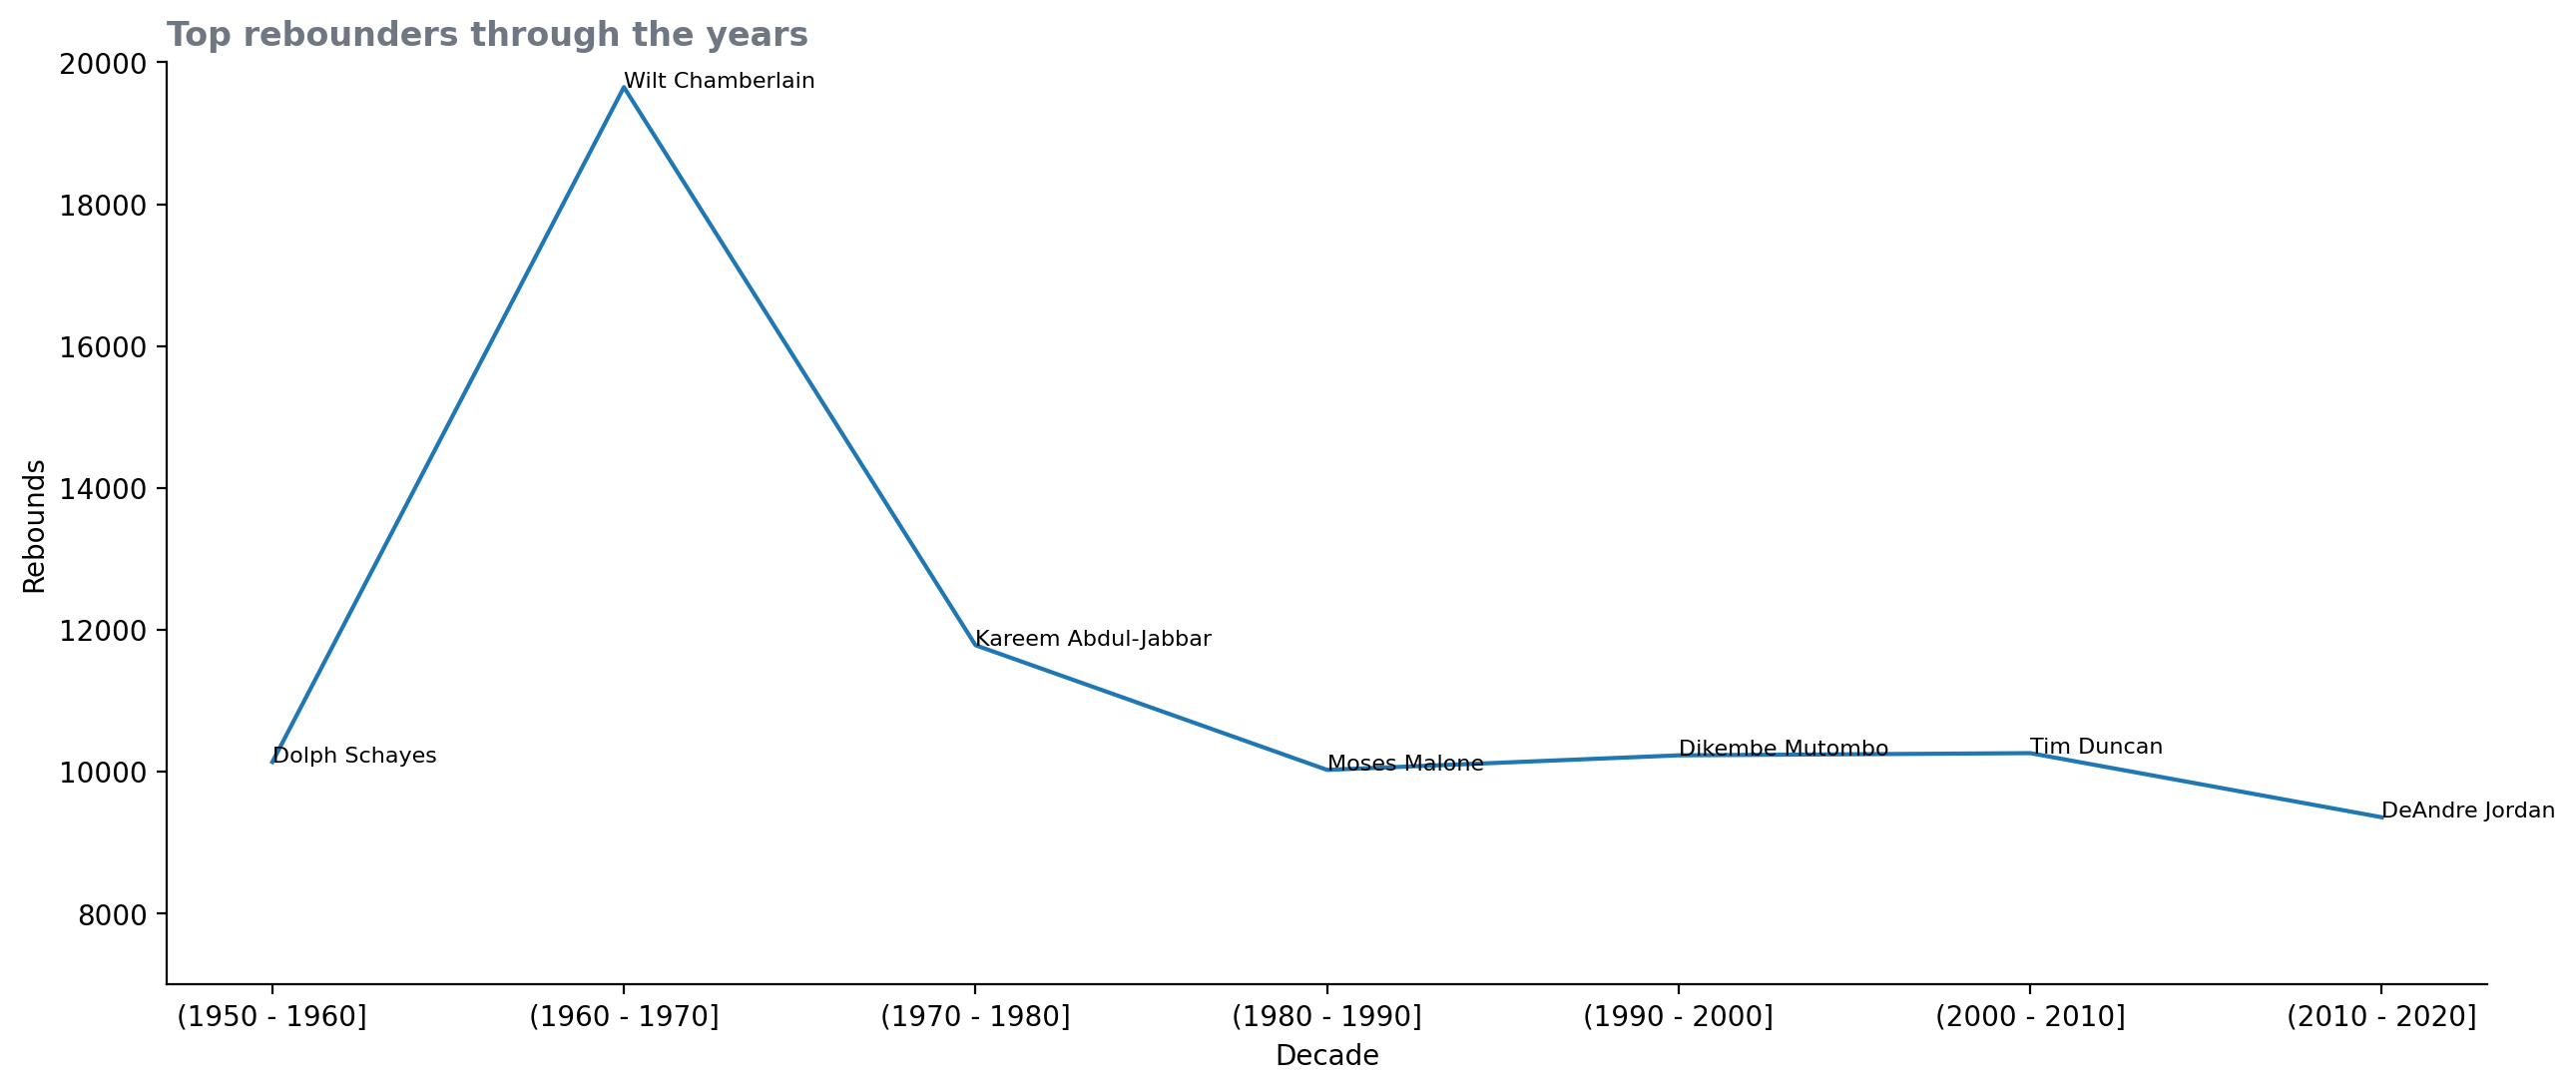

In [45]:
plt.figure(figsize=(15, 6))

ax = sns.lineplot(x="Decade",y='Rebounds',data=best_rebounders)
for i, player in enumerate(best_rebounders['Player']):
    ax.annotate(player,(best_rebounders['Decade'][i],best_rebounders['Rebounds'][i]),size=8)
ax.set_title('Top rebounders through the years',size = 12, color ='#6f7782',weight='bold',loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(7000,20000)

plt.show()

In [43]:
grouped_decades = df.groupby('Decade').agg({
    'Rebounds': 'sum',
    'Offensive Rebounds' : 'sum',
    'Defensive Rebounds' : 'sum'})

grouped_decades.drop('(2020 - 2023]',inplace=True)
grouped_decades['Offensive Rebounds'] = grouped_decades['Offensive Rebounds'] // 1000
grouped_decades['Defensive Rebounds'] = grouped_decades['Defensive Rebounds'] // 1000
grouped_decades['Rebounds'] = grouped_decades['Rebounds'] // 1000
grouped_decades = grouped_decades.reset_index()
grouped_decades


,Decade,Rebounds,Offensive Rebounds,Defensive Rebounds
0,(1950 - 1960],363,37.0,108.0
1,(1960 - 1970],526,46.0,134.0
2,(1970 - 1980],745,207.0,451.0
3,(1980 - 1990],907,297.0,609.0
4,(1990 - 2000],995,306.0,688.0
5,(2000 - 2010],1083,297.0,786.0
6,(2010 - 2020],1093,262.0,830.0


C:\Users\hamza\AppData\Local\Temp\ipykernel_12816\1795859285.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(r, color = '#6f7782', size = 10)
C:\Users\hamza\AppData\Local\Temp\ipykernel_12816\1795859285.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, color = '#6f7782', size = 10)


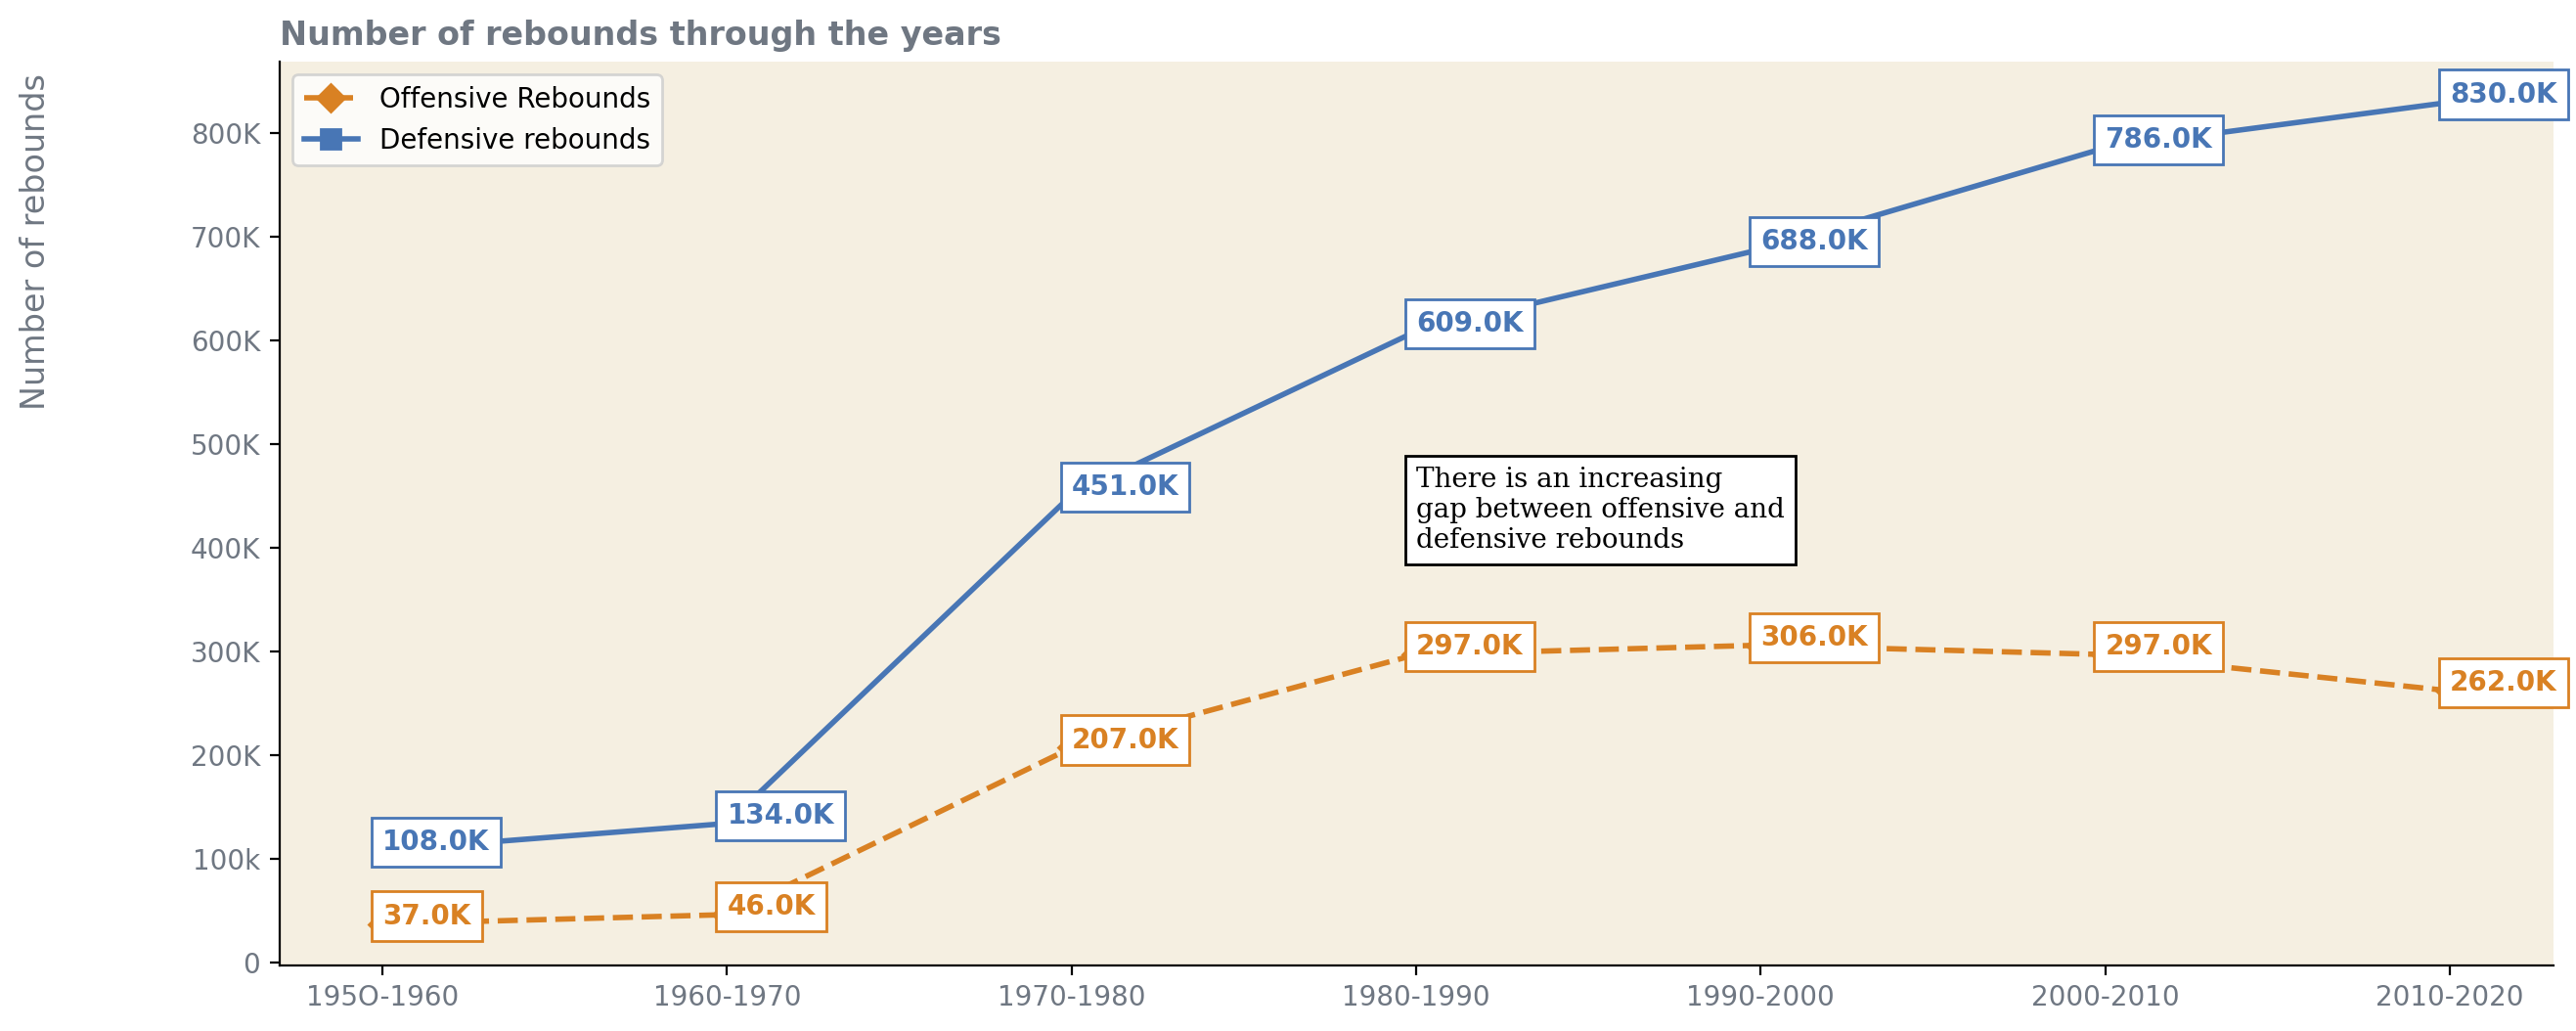

In [44]:
fig, ax = plt.subplots(figsize=(15,6))  




r = [None, "0","100k", "200K", "300K", "400K", "500K", "600K","700K","800K"]

ax.set_yticklabels(r, color = '#6f7782', size = 10)

years = ['195O-1960', '1960-1970','1970-1980', '1980-1990','1990-2000','2000-2010','2010-2020']
 
ax.set_xticklabels(years, color = '#6f7782', size = 10)
ax.plot(grouped_decades['Decade'], grouped_decades['Offensive Rebounds'], color = '#d98123', ls='--', lw=2, marker='D', markersize = 7,label = 'Offensive Rebounds') 
ax.plot(grouped_decades['Decade'], grouped_decades['Defensive Rebounds'], color = '#4876b5', lw=2,marker='s', markersize = 7,label = 'Defensive rebounds')
for i, elem  in enumerate(grouped_decades.Decade):
    ax.annotate(f"{ grouped_decades['Offensive Rebounds'][i]}K",(i , grouped_decades['Offensive Rebounds'][i]  ),size=10,annotation_clip=True, color='#d98123', weight='bold',bbox=dict(facecolor='white',edgecolor='#d98123'))
    ax.annotate(f"{ grouped_decades['Defensive Rebounds'][i]}K", (grouped_decades.index[i] , grouped_decades['Defensive Rebounds'][i] ),size=10,annotation_clip=True, color='#4876b5', weight='bold',bbox=dict(facecolor='white',edgecolor='#4876b5'))


ax.text(3,400,"There is an increasing \ngap between offensive and\ndefensive rebounds ",fontsize=10,fontname='serif', bbox=dict(facecolor='white'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc="upper left")
ax.set_ylabel("Number of rebounds", size = 12, color ='#6f7782')
ax.yaxis.set_label_coords(-0.1, 0.8)
ax.set_title('Number of rebounds through the years',size = 12, color ='#6f7782',weight='bold',loc='left')
ax.set_facecolor('#f5efe1')

plt.show()